## Twitter Sentiment Analysis on Pfizer

#### import modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud


import warnings
warnings.simplefilter(action='ignore', 
                      category=FutureWarning)


In [7]:
data = pd.read_csv('vaccination_tweets.csv')
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [8]:
#show datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4280 non-null   int64 
 1   user_name         4280 non-null   object
 2   user_location     3398 non-null   object
 3   user_description  4009 non-null   object
 4   user_created      4280 non-null   object
 5   user_followers    4280 non-null   int64 
 6   user_friends      4280 non-null   int64 
 7   user_favourites   4280 non-null   int64 
 8   user_verified     4280 non-null   bool  
 9   date              4280 non-null   object
 10  text              4280 non-null   object
 11  hashtags          3188 non-null   object
 12  source            4279 non-null   object
 13  retweets          4280 non-null   int64 
 14  favorites         4280 non-null   int64 
 15  is_retweet        4280 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 476.6+ KB


### Clean text data

1) Remove special characters or link etc

In [9]:
def cleanText(text):
    text= re.sub(r'@[A-Za-z0-9]+','',text)     #remove word and symbol
    text= re.sub(r'#','',text) #remove the hashtag symbol
    text= re.sub(r'RT[\s+]','',text) #remove the Retweet RT
    text= re.sub(r'https?:\/\/\S+','',text) #remove the hyperlink
    text = re.sub('\n', '', text) #remove the single character 
    return text




In [54]:
data2 = data.copy()
data2['text'] = data2['text'].apply(lambda x: cleanText(x))

print(data2[['text']])



                                                   text
0     Same folks said daikon paste could treat a cyt...
1     While the world has been on the wrong side of ...
2     coronavirus SputnikV AstraZeneca PfizerBioNTec...
3     Facts are immutable, Senator, even when you're...
4     Explain to me again why we need a vaccine   wh...
...                                                 ...
4275  Just had my first dose of the PfizerBioNTech v...
4276  Andalucia to start vaccinating over 80s living...
4277  First Pfizer covid 19 vaccine dose done ✅ very...
4278  A ‘healthy’ doctor died two weeks after gettin...
4279  Day 21 post covid19 vaccinationMy 2nd jab due ...

[4280 rows x 1 columns]


(4280, 16)

2) Remove emoji from the text

In [11]:
#Link example from the other profile
#https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1


RE_EMOJI = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+"
)


def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)

#test
print(strip_emoji('sdasasfadfafa🙄🤔'))

emoji = data2.text[2652:2653]
print(str(emoji))

print(strip_emoji(str(emoji)))


sdasasfadfafa
2652    "Welcome to Vaccine UK, your health is importa...
Name: text, dtype: object
2652    "Welcome to Vaccine UK, your health is importa...
Name: text, dtype: object


In [12]:
data2['text'] = data2['text'].apply(lambda x: strip_emoji(x))

print(data2[['text']])

                                                   text
0     Same folks said daikon paste could treat a cyt...
1     While the world has been on the wrong side of ...
2     coronavirus SputnikV AstraZeneca PfizerBioNTec...
3     Facts are immutable, Senator, even when you're...
4     Explain to me again why we need a vaccine   wh...
...                                                 ...
4275  Just had my first dose of the PfizerBioNTech v...
4276  Andalucia to start vaccinating over 80s living...
4277  First Pfizer covid 19 vaccine dose done  very ...
4278  A ‘healthy’ doctor died two weeks after gettin...
4279  Day 21 post covid19 vaccinationMy 2nd jab due ...

[4280 rows x 1 columns]


### Explanatory Data Analysis (EDA)

1) By country analysis

In [13]:
## Country locations

country_df = pd.read_csv("wikipedia-iso-country-codes.csv")


country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.tail()



,country,alpha2,alpha3,numeric,iso
241,American Samoa,AS,ASM,16,ISO 3166-2:AS
242,Algeria,DZ,DZA,12,ISO 3166-2:DZ
243,Albania,AL,ALB,8,ISO 3166-2:AL
244,Afghanistan,AF,AFG,4,ISO 3166-2:AF
245,Åland Islands,AX,ALA,248,ISO 3166-2:AX


In [14]:
## Create new column
data2['country'] = data2['user_location']
data2.head(1)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,country
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,"La Crescenta-Montrose, CA"


In [15]:
## Merge two dataframe
data2 = data2.merge(country_df, on="country")
data2.tail(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,country,alpha2,alpha3,numeric,iso
470,1347212175572668416,Linn Loves 5 Boys,Norway,'Children aren't coloring books. You don't get...,2015-09-06 02:44:42,1829,17,229858,False,2021-01-07 16:03:07,...,"['COVID19', 'PfizerBioNTech']",Twitter for Android,0,3,False,Norway,NO,NOR,578,ISO 3166-2:NO
471,1348005855921365000,Vanessa Richardson,Georgia,"Daughter, Sister, MS4 (4th year Medical Studen...",2009-06-22 22:18:16,24,49,18,False,2021-01-09 20:36:55,...,NaN,Twitter for iPhone,0,2,False,Georgia,GE,GEO,268,ISO 3166-2:GE
472,1349386554708537345,Euronews Albania,Albania,All Views.,2018-11-12 13:04:41,3099,80,76,False,2021-01-13 16:03:19,...,"['Vaccine', 'PfizerBioNTech']",Twitter Web App,0,2,False,Albania,AL,ALB,8,ISO 3166-2:AL
473,1352004146430308352,Mohamed Visham ❓🎈,Maldives,#JusticeForMoyameehaa #JusticeForYaamyn,2012-05-31 10:56:08,6179,1410,133280,False,2021-01-20 21:24:42,...,['oxfordastrazeneca'],Twitter Web App,0,1,False,Maldives,MV,MDV,462,ISO 3166-2:MV
474,1351536735126171648,Keith Azopardi,Gibraltar,"Dad; Leader of the Opposition, QC, Social Demo...",2017-05-17 19:54:46,799,190,1505,False,2021-01-19 14:27:22,...,"['PfizerBioNTech', 'vaccine']",Twitter for iPhone,2,11,False,Gibraltar,GI,GIB,292,ISO 3166-2:GI
475,1350860704698523648,Eddie,Monaco,NaN,2016-11-27 15:12:36,10,29,161,False,2021-01-17 17:41:04,...,"['vaccine', 'PfizerBioNTech', 'Moderna', 'peop...",Twitter for iPhone,0,1,False,Monaco,MC,MCO,492,ISO 3166-2:MC
476,1349724992200556546,"Alexander Ruebben, MD",Monaco,"CEO and Founder of AR Baltic Medical, Interven...",2009-05-05 09:51:28,716,401,4394,False,2021-01-14 14:28:09,...,['PfizerBioNTech'],Twitter Web App,2,2,False,Monaco,MC,MCO,492,ISO 3166-2:MC
477,1350718620540792832,Abdiqani Ainan,Somalia,Public Health Researcher - Founder of Ainan ...,2017-03-25 09:02:30,213,217,152,False,2021-01-17 08:16:28,...,['PfizerBioNTech'],Twitter Web App,0,0,False,Somalia,SO,SOM,706,ISO 3166-2:SO
478,1350492223608037376,Lainah,Myanmar,NaN,2010-09-26 01:27:08,432,209,9026,False,2021-01-16 17:16:51,...,NaN,Twitter for Android,0,4,False,Myanmar,MM,MMR,104,ISO 3166-2:MM
479,1350184154147778565,TK Jopi🇧🇼🇿🇦,Botswana,NaN,2013-01-04 05:46:09,463,1001,2003,False,2021-01-15 20:52:42,...,NaN,Twitter for Android,0,0,False,Botswana,BW,BWA,72,ISO 3166-2:BW


(480, 24)


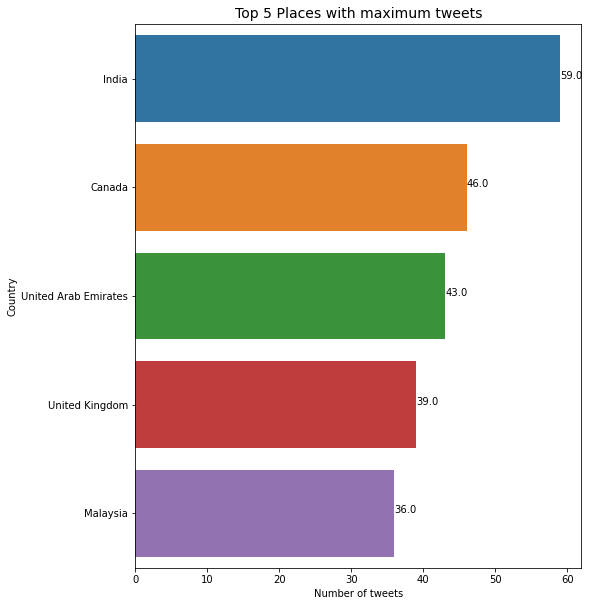

In [53]:
## Top 5 tweets by country

plt.figure(figsize=(8,10))
g=sns.barplot(data2["user_location"].value_counts().values[0:5],
             data2["user_location"].value_counts().index[0:5]);
plt.title("Top 5 Places with maximum tweets",fontsize=14)
plt.xlabel("Number of tweets")
plt.ylabel("Country")


# to plot the values for each bar

for p in g.patches:
        value = format(p.get_width(), '.1f')
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        g.annotate(value, (x, y))

plt.show()


<AxesSubplot:>

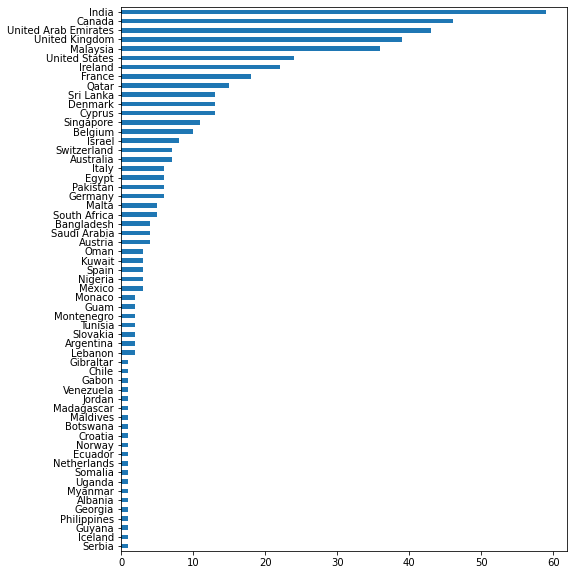

In [17]:
## All tweet by countries
plt.figure(figsize=(8,10))

data2["user_location"].value_counts().sort_values().plot(kind = 'barh')


2) By Tweet Source

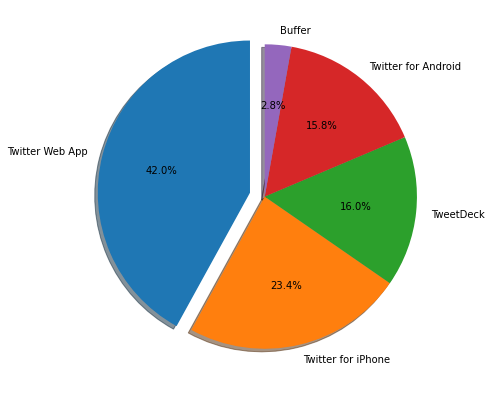

In [18]:
sources=data2['source'].value_counts().sort_values(ascending=False)[:5]

#only explode the highest percentage
explode = (0.1, 0, 0, 0, 0)  

# Plot pie chart
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.pie(sources, explode=explode, labels=sources.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()


3) Hashtags used

In [19]:
hashtags=data2['hashtags'].value_counts().sort_values(ascending=False)[:5]
print(hashtags)

['PfizerBioNTech']                                   49
['COVID19']                                           6
['Iran', 'PfizerBioNTech', 'vaccines']                6
['PfizerBioNTech', 'vaccine']                         6
['COVID19', 'PfizerBioNTech', 'vaccine', 'Dubai']     4
Name: hashtags, dtype: int64


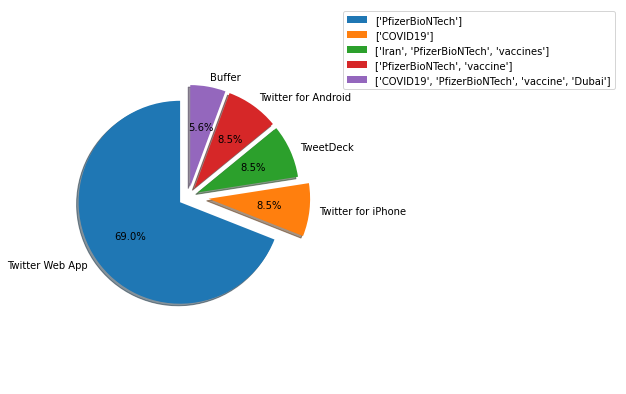

In [20]:
hashtags=data2['hashtags'].value_counts().sort_values(ascending=False)[:5]
explode = (0.1, 0.2, 0.1, 0.1, 0.1) 

# Plot pie chart
fig= plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(1,2,1) 
piechart=ax.pie(hashtags, explode=explode, labels=sources.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

# Add legend
ax2 = fig.add_subplot(1,2,2)
ax2.axis("off") 
ax2.legend(piechart[0],hashtags.keys())
plt.show()



4) By Date

In [21]:
# First date and latest data extracted
print(f" Data Available from {data2['date'].min()}")
print(f" Data Available to {data2['date'].max()}")

 Data Available from 2020-12-12 11:55:28
 Data Available to 2021-01-22 01:11:08


In [22]:
data3 = data2.copy()
data3['datedt'] = pd.to_datetime(data3['date'])

In [23]:
# Create new columns with date by year,month,day,hour etc
data3['year']      = data3['datedt'].dt.year
data3['month']     = data3['datedt'].dt.month
data3['day']       = data3['datedt'].dt.day
data3['dayofweek'] = data3['datedt'].dt.dayofweek
data3['hour']      = data3['datedt'].dt.hour
data3['minute']    = data3['datedt'].dt.minute
data3['dayofyear'] = data3['datedt'].dt.dayofyear
data3['date_only'] = data3['datedt'].dt.date



In [24]:
data3.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,iso,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only
0,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,...,ISO 3166-2:IN,2020-12-12 17:45:00,2020,12,12,5,17,45,347,2020-12-12
1,1338574693087936513,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,2012-06-11 13:50:05,3372,1713,119631,False,2020-12-14 20:00:51,...,ISO 3166-2:IN,2020-12-14 20:00:51,2020,12,14,0,20,0,349,2020-12-14
2,1338551175587786752,India Blooms,India,A news and reference portal on India and a 24X...,2009-10-10 11:19:34,16816,2448,20,False,2020-12-14 18:27:23,...,ISO 3166-2:IN,2020-12-14 18:27:23,2020,12,14,0,18,27,349,2020-12-14


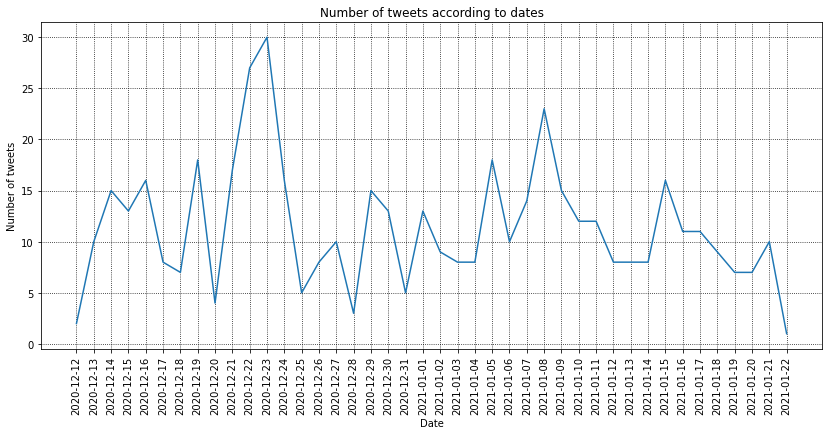

In [25]:
# Plot time series LinePlot

dt_only = data3['date_only'].value_counts()
dt_only = dt_only.sort_index()

plt.figure(figsize=(14,6))
ax=sns.lineplot(dt_only.index, dt_only.values)
ax.grid(color='black',linestyle='dotted')
ax.set(xticks=dt_only.index)

plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title("Number of tweets according to dates")
plt.show()


### Sentiment Analysis with TextBlob

In [43]:
# Create the function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create the function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity



In [56]:
# Create new column subj and polarity
data2['Subjectivity'] = data2['text'].apply(getSubjectivity)
data2['Polarity']     = data2['text'].apply(getPolarity)


In [57]:
data2[['text','Subjectivity','Polarity']]
print(data2.shape)

(4280, 18)


 For TextBlob, 
- Polarity is > 0, it is considered positive, 
- Polarity < 0 is considered negative 
- Polarity == 0 is considered as neutral.

In [58]:
# Create the function compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
  

In [60]:
# Create new column , score
data2['Analysis']= data2['Polarity'].apply(getAnalysis)
data2.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Subjectivity,Polarity,Analysis
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.125000,0.00,Neutral
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,0.900000,-0.50,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus SputnikV AstraZeneca PfizerBioNTec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.033333,0.00,Neutral
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,0.550000,-0.05,Negative
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine wh...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.000000,0.00,Neutral


In [62]:
data2['Analysis'].value_counts()

Neutral     2015
Positive    1839
Negative     426
Name: Analysis, dtype: int64

In [75]:
# Shows the top 5 tweets with highest polarity scores
Highest =data2.nlargest(5,'Polarity')[['text','Polarity']]
print(Highest)

                                                  text  Polarity
11    COVID19 CovidVaccine vaccine Corona   PfizerB...       1.0
208  What a great day for our Country &amp; the Wor...       1.0
347  Our MD Dr Susannah Thompson pulling out all th...       1.0
420  One down...one to go! Excellent vaccination se...       1.0
650  Incredibly honored to draw up COVID vaccine do...       1.0


In [72]:
# Shows the top 5 tweets with among highest polarity scores
sortedPolarity= data3.sort_values(by=['Polarity'], ascending=False)
print(sortedPolarity[['text','Polarity']][0:5])

     

                                                  text  Polarity
252  Welcome Move !COVID19 coronavirus Pfizer Pfize...      1.00
311  This is brilliant news and signals the commenc...      0.90
153  Beautiful summary of how RNA vaccine works. Pf...      0.85
422  A happy day across Europe as the EuropeanUnion...      0.80
303  Great day  COVIDVaccination COVID19 frontlinew...      0.80


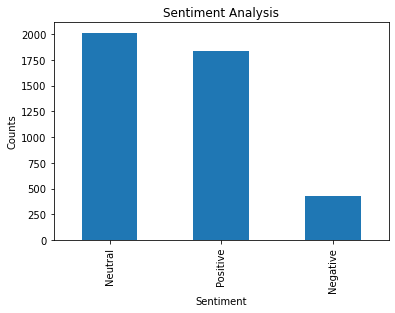

In [63]:
# General overview of distribution of Sentiment
# show the value counts

data2['Analysis'].value_counts()

# plot and visualize the counts
data2['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [76]:
## Top 5 tweets by country

fig, ax = plt.subplots(figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", palette=["b"],
           data=data2[(data2.Analysis== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])

ValueError: Grouper and axis must be same length

<Figure size 576x720 with 0 Axes>

        datedt  Analysis  vals
0   2020-12-12  Negative     8
1   2020-12-13  Negative    10
2   2020-12-14  Negative    11
3   2020-12-15  Negative    16
4   2020-12-16  Negative    16
..         ...       ...   ...
121 2021-01-18  Positive    22
122 2021-01-19  Positive    33
123 2021-01-20  Positive    50
124 2021-01-21  Positive    66
125 2021-01-22  Positive     5

[126 rows x 3 columns]


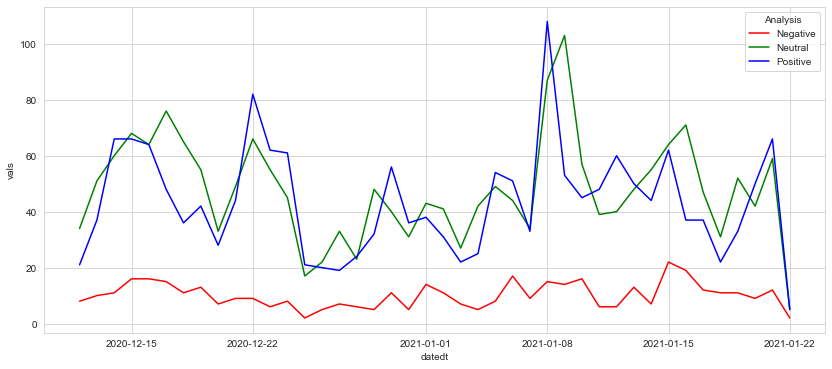

In [92]:
# Resampling the time series data 
#  based on daily frequency 
# 'D' indicates days 
  
data2['datedt'] = pd.to_datetime(data2['date'])
timeline = data2.resample('D', on='datedt')['Analysis'].value_counts().unstack(1)

timeline.reset_index(inplace=True)
# multiple unpivot columns 
timeline = timeline.melt('datedt', var_name='Analysis',  value_name='vals')
print(timeline)

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
sns.lineplot(x="datedt", y="vals", hue="Analysis", data=timeline, palette=["r", "g","b"])
plt.show()